(lecture04:homework)=
# Homework 4

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Ahammad
+ **Last Name:** Ashar
+ **Email:** lnu43@purdue.edu

Let me set you up with some nice code for plotting and downloading files.

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')

MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,

        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,

        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,

        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,

        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,

        # Remove legend frame
        'legend.frameon': False,

        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.

    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'

    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

/tmp/ipython-input-1618506332.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'svg')


## Problem 1 - Visual analysis of a variable-speed compressor experiment

In this problem you are going to need [this](https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/compressor_data.xlsx) dataset. The dataset was kindly provided to us by [Professor Davide Ziviani](https://scholar.google.com/citations?user=gPdAtg0AAAAJ&hl=en).
As before, you can either put it on your Google drive or just download it with the code segment below:

In [5]:
!curl -O 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/compressor_data.xlsx'
!curl -O 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/temp_price.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14771  100 14771    0     0  97076      0 --:--:-- --:--:-- --:--:-- 97177
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4126  100  4126    0     0  23644      0 --:--:-- --:--:-- --:--:-- 23712


The data are part of a an experimental study of a variable speed reciprocating compressor.
The experimentalists varied two temperatures $T_e$ and $T_c$ (both in degrees C) and they measured various other quantities.
Your goal is to understand the experimental design and develop some intuition of the map between $T_e$ and $T_c$ and measured Capacity and Power (both in W).
Answer the following questions.

+ Do the scatter plot of $T_e$ and $T_c$. This will reveal the experimental design picked by the experimentalists. Make sure you label the axes correctly. Hint: These are columns `T_e` and `T_c` of the data frame `data`.

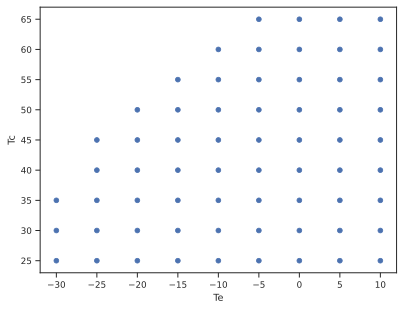

In [47]:
import pandas as pd
compressor_data = pd.read_excel('compressor_data.xlsx')
compressor_data.head().round(2)
fig, ax = make_full_width_fig()
ax.scatter(compressor_data['T_e'], compressor_data['T_c'])
ax.set_xlabel('Te')
ax.set_ylabel('Tc')
save_for_book(fig, 'hw4.fig1');

+ Is there a gap in the experimental design? If yes, why do you think they have a gap?

Used approximations lead to a margin of error beteen theoretical and experimental

+ Do the scatter plot between `T_e` and `Capacity`.

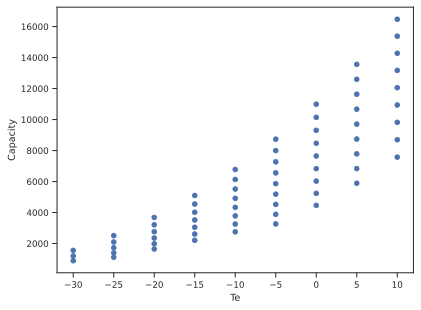

In [48]:
fig, ax = make_full_width_fig()
ax.scatter(compressor_data['T_e'], compressor_data['Capacity'])
ax.set_xlabel('Te')
ax.set_ylabel('Capacity')
save_for_book(fig, 'hw4.fig2');

+ Do the scatter plot between `T_c` and `Capacity`.

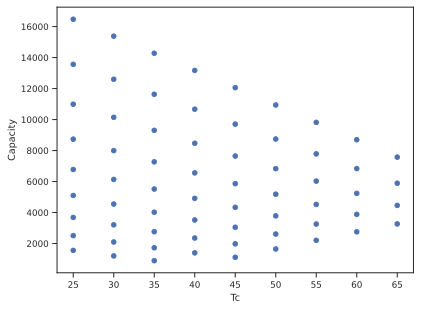

In [49]:
fig, ax = make_full_width_fig()
ax.scatter(compressor_data['T_c'], compressor_data['Capacity'])
ax.set_xlabel('Tc')
ax.set_ylabel('Capacity')
save_for_book(fig, 'hw4.fig3');

+ Do the scatter plot between `T_e` and `Power`.

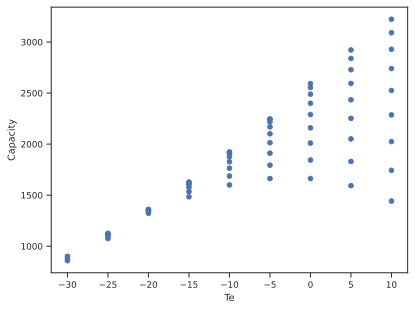

In [50]:
fig, ax = make_full_width_fig()
ax.scatter(compressor_data['T_e'], compressor_data['Power'])
ax.set_xlabel('Te')
ax.set_ylabel('Capacity')
save_for_book(fig, 'hw4.fig4');

+ Do the scatter plot between `T_c` and `Power`.

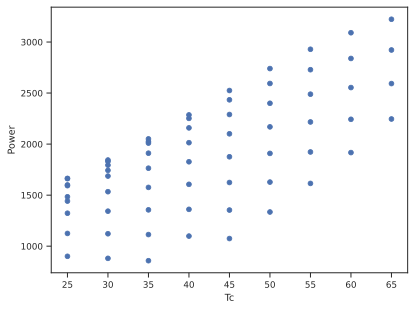

In [51]:
fig, ax = make_full_width_fig()
ax.scatter(compressor_data['T_c'], compressor_data['Power'])
ax.set_xlabel('Tc')
ax.set_ylabel('Power')
save_for_book(fig, 'hw4.fig5');

+ We are lucky that we only have two experimental control variables because can do a bit more thing with scatter. You can color each point in the scatter plot according to a scale that follows an output variable. Let me show you what I mean by doing the plot for the `Capacity`.

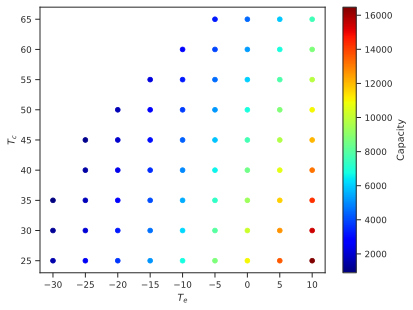

In [52]:
from matplotlib import cm
fig, ax = plt.subplots()
cs = ax.scatter(compressor_data['T_e'], compressor_data['T_c'], # So far a standard scatter plot
                c=compressor_data['Capacity'], # This is telling matplotlib what the color
                                 # of the points should be
                cmap=cm.jet      # This is saying to use the jet colormap
                                 # (blue = smallest values, red = highest values)
               )
plt.colorbar(cs, label='Capacity')   # This gives us a colorbar
ax.set_xlabel('$T_e$')
ax.set_ylabel('$T_c$');

Now repeat the same thing for the `Power`:

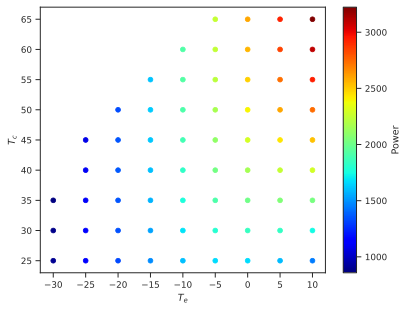

In [53]:
fig, ax = plt.subplots()
cs = ax.scatter(compressor_data['T_e'], compressor_data['T_c'], # So far a standard scatter plot
                c=compressor_data['Power'], # This is telling matplotlib what the color
                                 # of the points should be
                cmap=cm.jet      # This is saying to use the jet colormap
                                 # (blue = smallest values, red = highest values)
               )
plt.colorbar(cs, label='Power')   # This gives us a colorbar
ax.set_xlabel('$T_e$')
ax.set_ylabel('$T_c$');

## Problem 2 - Visual analysis of an airfoil experiment

In this problem, you are going to repeat what you did in Problem 1, but without my guidance!

The dataset we are going to use is the [Airfoil Self-Noise Data Set](https://archive.ics.uci.edu/dataset/291/airfoil+self+noise)
From this reference, the descreption of the dataset is as follows:

> The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.
>
> Attribute Information:
> This problem has the following inputs:
> 1. Frequency, in Hertzs.
> 2. Angle of attack, in degrees.
> 3. Chord length, in meters.
> 4. Free-stream velocity, in meters per second.
> 5. Suction side displacement thickness, in meters.

> The only output is:
> 6. Scaled sound pressure level, in decibels.

Before we start, let's download and load the data.
I am going to put them in a dataframe for you.

In [54]:
!curl -O 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
import numpy as np
import pandas as pd
raw_data = np.loadtxt('airfoil_self_noise.dat')
df = pd.DataFrame(raw_data,
                  columns=['Frequency', 'Angle_of_attack', 'Chord_length',
                            'Velocity', 'Suction_thickness', 'Sound_pressure'])
df

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59984    0 59984    0     0   116k      0 --:--:-- --:--:-- --:--:--  117k


,Frequency,Angle_of_attack,Chord_length,Velocity,Suction_thickness,Sound_pressure
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500.0,15.6,0.1016,39.6,0.052849,110.264
1499,3150.0,15.6,0.1016,39.6,0.052849,109.254
1500,4000.0,15.6,0.1016,39.6,0.052849,106.604
1501,5000.0,15.6,0.1016,39.6,0.052849,106.224


+ Do the histogtrams of all variables. Use as many code segments you need below to plot the histogram of each variable in a different plot. Make sure you label the axes correctly.

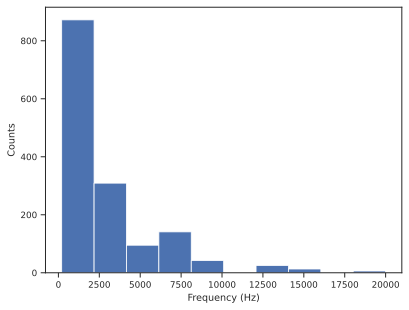

In [55]:
fig, ax = make_full_width_fig()
ax.hist(df['Frequency'])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Counts')
save_for_book(fig, 'hw4.fig6')

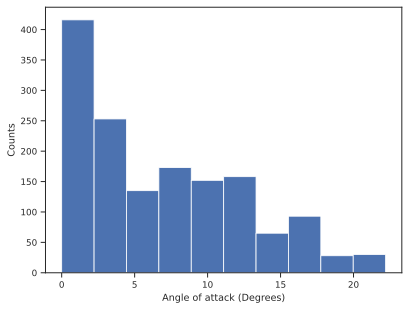

In [56]:
fig, ax = make_full_width_fig()
ax.hist(df['Angle_of_attack'])
ax.set_xlabel('Angle of attack (Degrees)')
ax.set_ylabel('Counts')
save_for_book(fig, 'hw4.fig7')

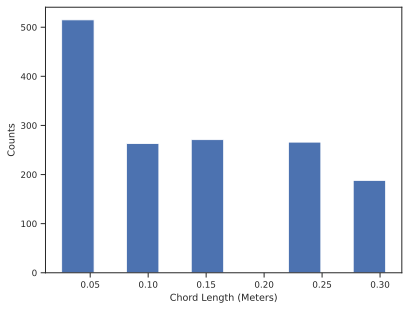

In [57]:
fig, ax = make_full_width_fig()
ax.hist(df['Chord_length'])
ax.set_xlabel('Chord Length (Meters)')
ax.set_ylabel('Counts')
save_for_book(fig, 'hw4.fig8')

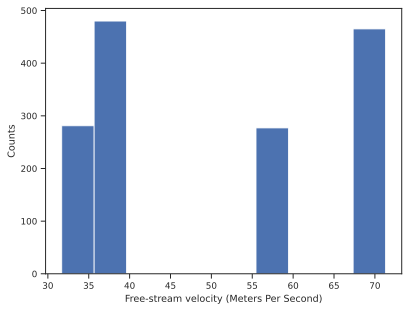

In [58]:
fig, ax = make_full_width_fig()
ax.hist(df['Velocity'])
ax.set_xlabel('Free-stream velocity (Meters Per Second)')
ax.set_ylabel('Counts')
save_for_book(fig, 'hw4.fig9')

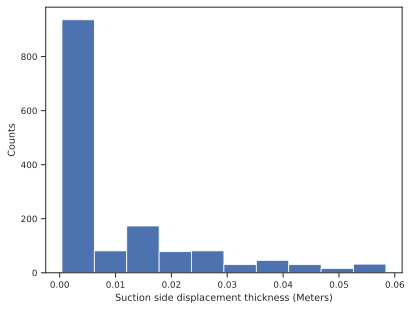

In [59]:
fig, ax = make_full_width_fig()
ax.hist(df['Suction_thickness'])
ax.set_xlabel('Suction side displacement thickness (Meters)')
ax.set_ylabel('Counts')
save_for_book(fig, 'hw4.fig10')

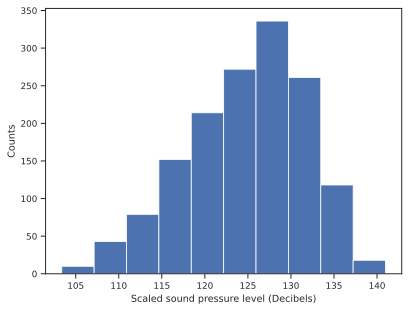

In [60]:
fig, ax = make_full_width_fig()
ax.hist(df['Sound_pressure'])
ax.set_xlabel('Scaled sound pressure level (Decibels)')
ax.set_ylabel('Counts')
save_for_book(fig, 'hw4.fig11')

+ Do the scatter plot between all input variables. This will give you an idea of the range of experimental conditions. Are there any holes in the experimental dataset, i.e., places where you have no data?

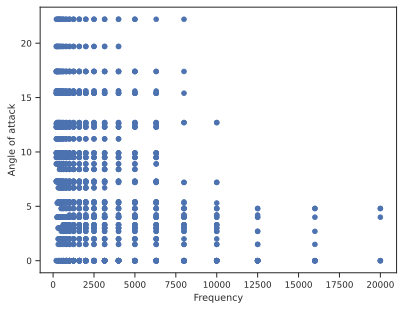

In [61]:
fig, ax = make_full_width_fig()
ax.scatter(df['Frequency'], df['Angle_of_attack'])
ax.set_xlabel('Frequency')
ax.set_ylabel('Angle of attack')
save_for_book(fig, 'hw4.fig12');

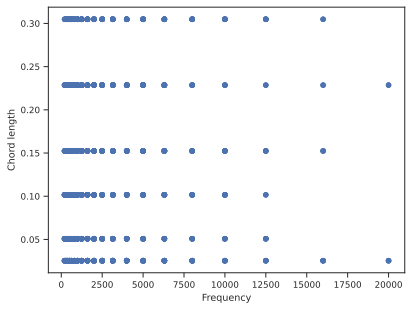

In [62]:
fig, ax = make_full_width_fig()
ax.scatter(df['Frequency'], df['Chord_length'])
ax.set_xlabel('Frequency')
ax.set_ylabel('Chord length')
save_for_book(fig, 'hw4.fig13');

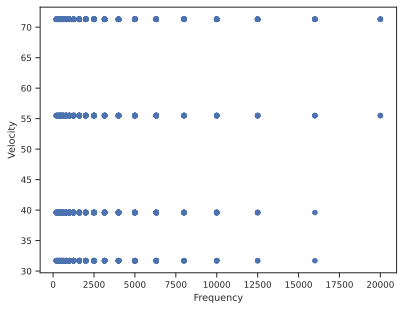

In [63]:
fig, ax = make_full_width_fig()
ax.scatter(df['Frequency'], df['Velocity'])
ax.set_xlabel('Frequency')
ax.set_ylabel('Velocity')
save_for_book(fig, 'hw4.fig14');

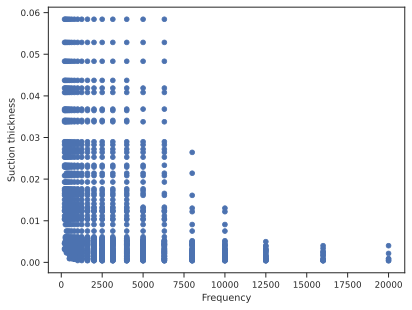

In [64]:
fig, ax = make_full_width_fig()
ax.scatter(df['Frequency'], df['Suction_thickness'])
ax.set_xlabel('Frequency')
ax.set_ylabel('Suction thickness')
save_for_book(fig, 'hw4.fig15');

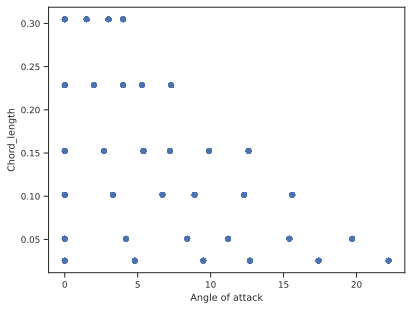

In [65]:
fig, ax = make_full_width_fig()
ax.scatter(df['Angle_of_attack'], df['Chord_length'])
ax.set_xlabel('Angle of attack')
ax.set_ylabel('Chord_length')
save_for_book(fig, 'hw4.fig16');

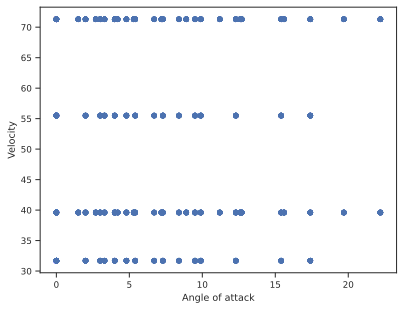

In [66]:
fig, ax = make_full_width_fig()
ax.scatter(df['Angle_of_attack'], df['Velocity'])
ax.set_xlabel('Angle of attack')
ax.set_ylabel('Velocity')
save_for_book(fig, 'hw4.fig17');

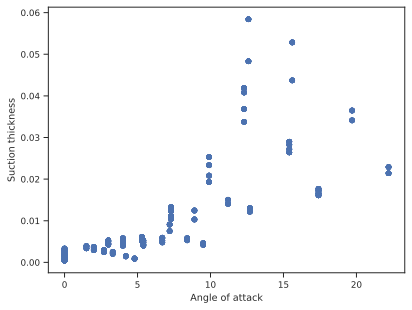

In [67]:
fig, ax = make_full_width_fig()
ax.scatter(df['Angle_of_attack'], df['Suction_thickness'])
ax.set_xlabel('Angle of attack')
ax.set_ylabel('Suction thickness')
save_for_book(fig, 'hw4.fig18');

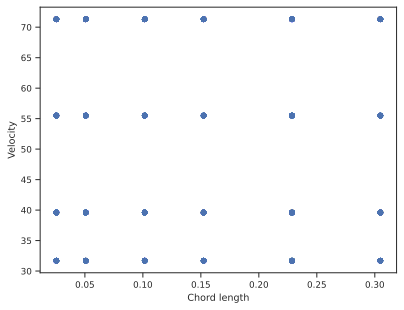

In [68]:
fig, ax = make_full_width_fig()
ax.scatter(df['Chord_length'], df['Velocity'])
ax.set_xlabel('Chord length')
ax.set_ylabel('Velocity')
save_for_book(fig, 'hw4.fig19');

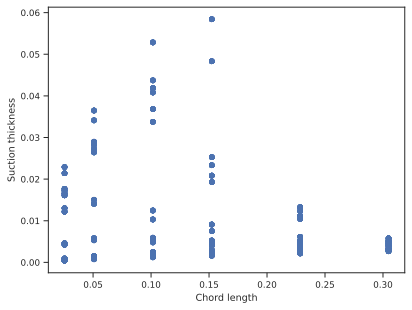

In [69]:
fig, ax = make_full_width_fig()
ax.scatter(df['Chord_length'], df['Suction_thickness'])
ax.set_xlabel('Chord length')
ax.set_ylabel('Suction thickness')
save_for_book(fig, 'hw4.fig20');

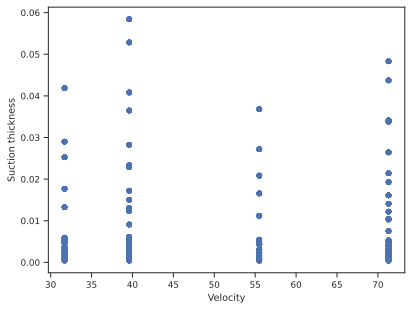

In [70]:
fig, ax = make_full_width_fig()
ax.scatter(df['Velocity'], df['Suction_thickness'])
ax.set_xlabel('Velocity')
ax.set_ylabel('Suction thickness')
save_for_book(fig, 'hw4.fig21');

We have a great level of correlation for the most part, however we see multiple parts within the scatter charts without any correlating data.

+  Do the scatter plot between each input variable and the output. This will give you an idea of the relationship between each input and the output. Do you observe any obvious patterns?

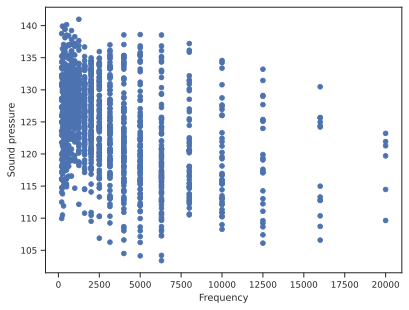

In [71]:
fig, ax = make_full_width_fig()
ax.scatter(df['Frequency'], df['Sound_pressure'])
ax.set_xlabel('Frequency')
ax.set_ylabel('Sound pressure')
save_for_book(fig, 'hw4.fig22');

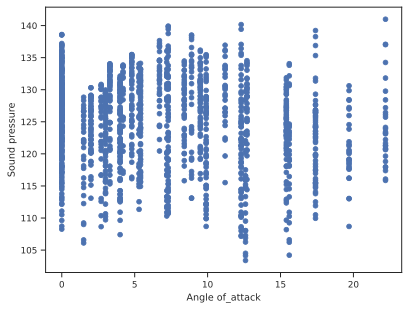

In [72]:
fig, ax = make_full_width_fig()
ax.scatter(df['Angle_of_attack'], df['Sound_pressure'])
ax.set_xlabel('Angle of_attack')
ax.set_ylabel('Sound pressure')
save_for_book(fig, 'hw4.fig23');

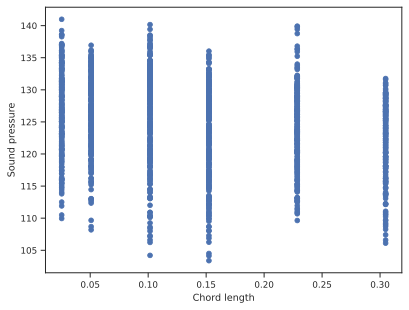

In [73]:
fig, ax = make_full_width_fig()
ax.scatter(df['Chord_length'], df['Sound_pressure'])
ax.set_xlabel('Chord length')
ax.set_ylabel('Sound pressure')
save_for_book(fig, 'hw4.fig24');

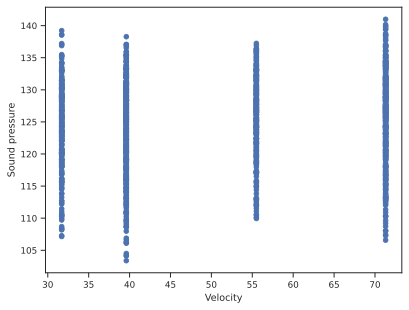

In [74]:
fig, ax = make_full_width_fig()
ax.scatter(df['Velocity'], df['Sound_pressure'])
ax.set_xlabel('Velocity')
ax.set_ylabel('Sound pressure')
save_for_book(fig, 'hw4.fig25');

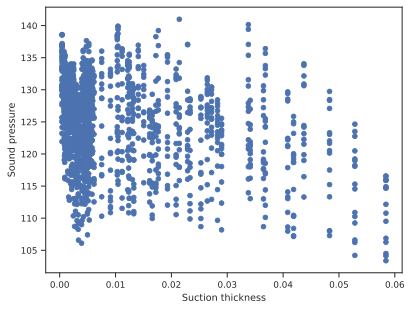

In [75]:
fig, ax = make_full_width_fig()
ax.scatter(df['Suction_thickness'], df['Sound_pressure'])
ax.set_xlabel('Suction thickness')
ax.set_ylabel('Sound pressure')
save_for_book(fig, 'hw4.fig26');

Sound pressure seems to alot high in sections with low suction thickness, larger chord length with a low angle of attack seems to make the most sound pressure

+ Now pick the two input variables you think are the most important and do the scatter plot between them using the output to color the points (see the last question of Problem 1). Feel free to repeat it with more than two pairs of inputs if you want. Briefly discuss your findings.

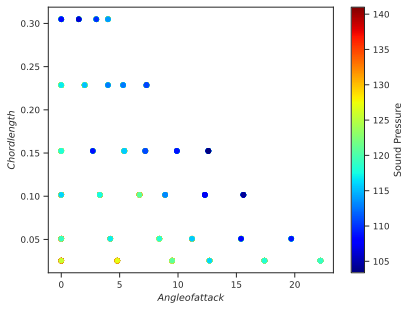

In [76]:
fig, ax = plt.subplots()
cs = ax.scatter(df['Angle_of_attack'], df['Chord_length'], # So far a standard scatter plot
                c=df['Sound_pressure'], # This is telling matplotlib what the color
                                 # of the points should be
                cmap=cm.jet      # This is saying to use the jet colormap
                                 # (blue = smallest values, red = highest values)
               )
plt.colorbar(cs, label='Sound Pressure')   # This gives us a colorbar
ax.set_xlabel('$Angle of attack$')
ax.set_ylabel('$Chord length$');

This backs the conclusion drawn by us using the prior scatter charts and allows us to have a more conclusive answer.